In [436]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pymc as pm

%matplotlib inline

sns.set()

print ('!!! NOTE! - REMEMBER TO RUN covid_confirmed.ipynb first to produce up-2-date .pkl !!!')

!!! NOTE! - REMEMBER TO RUN covid_confirmed.ipynb first to produce up-2-date .pkl !!!


In [437]:
with open ('country_data.pkl','rb') as f:
    country_dict = pickle.load(f)
    

A = 'Singapore'

# not used
B = 'Sweden'
C = 'Spain'
D = 'US'
D = 'Taiwan*'

country_a = country_dict[A]
country_b = country_dict[B]
country_c = country_dict[C]
country_d = country_dict[D]

In [438]:
world_countries = pd.read_csv('world_pop.csv',sep=';',
                     encoding='ISO-8859-1',header=None,
                     names=['population'],
                    thousands=',')
world_countries.index = world_countries.index.str.strip()
pop_df = world_countries

In [439]:
'''
pop_df = pd.DataFrame(index=['Italy','Sweden','Spain','US',
                            'Austria','Germany','Belgium','Netherlands',
                            'France'], 
                      data=[60462000,10100000,46750000,331000000,
                           9000000,83800000,11600000,17100000,65300000],columns=['population'])
'''

"\npop_df = pd.DataFrame(index=['Italy','Sweden','Spain','US',\n                            'Austria','Germany','Belgium','Netherlands',\n                            'France'], \n                      data=[60462000,10100000,46750000,331000000,\n                           9000000,83800000,11600000,17100000,65300000],columns=['population'])\n"

In [440]:
# note - returns log of value
def compute_ppm(country,name):
    country['confirmed_per_M'] = (1e6 * country['confirmed'] / pop_df.loc[name,'population'])
    return country

country_a = compute_ppm(country_a,A)
country_b = compute_ppm(country_b,B)
country_c = compute_ppm(country_c,C)
country_d = compute_ppm(country_d,D)

limit = 1

# define a common starting point in the day that nr confirmed_per_million is >= 1

def cut_under_limit(df,l):
    return (df.loc[df['confirmed_per_M'] >= limit]).copy()

country_a = cut_under_limit(country_a,limit).reset_index()
country_b = cut_under_limit(country_b,limit).reset_index()
country_c = cut_under_limit(country_c,limit).reset_index()
country_d = cut_under_limit(country_d,limit).reset_index()

country_a['per_M_factor'] = country_a['confirmed_per_M'] / country_a['confirmed_per_M'].shift()
country_b['per_M_factor'] = country_b['confirmed_per_M'] / country_b['confirmed_per_M'].shift()
country_c['per_M_factor'] = country_c['confirmed_per_M'] / country_c['confirmed_per_M'].shift()
country_d['per_M_factor'] = country_d['confirmed_per_M'] / country_d['confirmed_per_M'].shift()


country_a.rename(columns={'index' : 'date'},inplace=True)
country_b.rename(columns={'index' : 'date'},inplace=True)
country_c.rename(columns={'index' : 'date'},inplace=True)
country_d.rename(columns={'index' : 'date'},inplace=True)

country_a

,date,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,confirmed_per_M,per_M_factor
0,2020-01-28,7,1.400000,2.0,0,NaN,0.0,0.0,1.196511,NaN
1,2020-01-29,7,1.000000,0.0,0,NaN,0.0,0.0,1.196511,1.000000
2,2020-01-30,10,1.428571,3.0,0,NaN,0.0,0.0,1.709302,1.428571
3,2020-01-31,13,1.300000,3.0,0,NaN,0.0,0.0,2.222092,1.300000
4,2020-02-01,16,1.230769,3.0,0,NaN,0.0,0.0,2.734883,1.230769
5,2020-02-02,18,1.125000,2.0,0,NaN,0.0,0.0,3.076743,1.125000
6,2020-02-03,18,1.000000,0.0,0,NaN,0.0,0.0,3.076743,1.000000
7,2020-02-04,24,1.333333,6.0,0,NaN,0.0,0.0,4.102324,1.333333
8,2020-02-05,28,1.166667,4.0,0,NaN,0.0,0.0,4.786045,1.166667
9,2020-02-06,28,1.000000,0.0,0,NaN,0.0,0.0,4.786045,1.000000


In [441]:
alpha_mu = 0.5
alpha_sigma = 1
beta_mu = 1
beta_sigma = 1

alpha = pm.Normal('alpha',mu=alpha_mu, tau=1/alpha_sigma ** 2)
beta = pm.Normal('beta',mu=beta_mu, tau=1/beta_sigma ** 2)
sigma = pm.Uniform('sigma',lower=0,upper=1)

X = np.linspace(0,max([country_a.index.max(),country_b.index.max(),
                       country_c.index.max(),country_d.index.max()]),100)

def standardize(x):
    return (x - x.mean()) / x.std()

def regression(x,y,alpha,beta,sigma):
    
    @pm.deterministic()
    def linreg_mu(x=x,alpha=alpha,beta=beta):
        return x * beta + alpha

    obs = pm.Normal('obs',mu=linreg_mu,tau = 1 / sigma ** 2,observed=True,value=y)
    
    model = pm.Model([alpha,beta,sigma,linreg_mu,obs])
    map_ = pm.MAP(model)
    map_.fit()

    mcmc = pm.MCMC(model)
    mcmc.sample(10000,5000,2)

    alpha_post = mcmc.trace('alpha')[:]
    beta_post = mcmc.trace('beta')[:]
    sigma_post = mcmc.trace('sigma')[:]
    linreg_mu_post = mcmc.trace('linreg_mu')[:,0]
    
    result = pd.DataFrame({'alpha_post':alpha_post,
                           'beta_post':beta_post,
                           'sigma_post':sigma_post,
                           'linreg_mu_post':linreg_mu_post})

    return result

    

In [442]:
result = regression(country_a.index.values,np.log10(country_a['confirmed_per_M']),alpha,beta,sigma)
result.describe()

 [-----------------100%-----------------] 10000 of 10000 complete in 1.5 sec

,alpha_post,beta_post,sigma_post,linreg_mu_post
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.423301,0.025906,0.131079,0.423301
std,0.039331,0.001396,0.013994,0.039331
min,0.309192,0.020863,0.094087,0.309192
25%,0.397938,0.025112,0.121728,0.397938
50%,0.421067,0.026004,0.129768,0.421067
75%,0.445815,0.026869,0.140212,0.445815
max,0.546488,0.030860,0.177615,0.546488


In [443]:
nr_samples = 1000

alphas = np.random.choice(result['alpha_post'],replace=True,size=nr_samples)
betas = np.random.choice(result['beta_post'],replace=True,size=nr_samples)

alpha_mean = alphas.mean()
beta_mean = betas.mean()

lines = [X[i] * betas + alphas for i in range(len(X))]


In [444]:
def slope_overall(country):
    slope,intercept,_,_,_ = sps.linregress(country.index,(np.log10(country['confirmed_per_M'])))
    return slope, intercept

no_testing_index = 7

def slope_after_limit(country,index):
    slope,intercept,_,_,_ = sps.linregress(country.index[index:],(np.log10(country['confirmed_per_M'][index:])))
    return slope,intercept
    


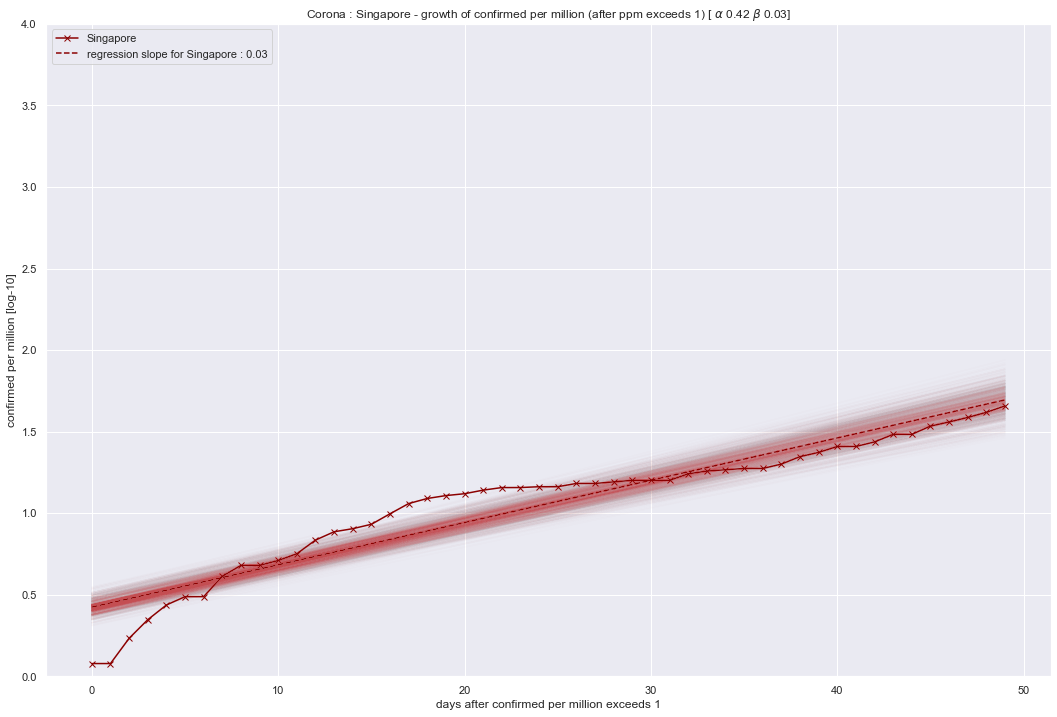

In [445]:
plt.figure(figsize=(18,12))
plt.plot(np.log10(country_a['confirmed_per_M']),'x-',label=A,c='darkred')
#plt.plot(np.log10(country_b['confirmed_per_M']),'x-',label=B,c='orange')
#plt.plot(np.log10(country_c['confirmed_per_M']),'x-',label=C,c='yellow')
#plt.plot(np.log10(country_d['confirmed_per_M']),'x-',label=D,c='magenta')



a_slope,a_intercept = slope_overall(country_a)
b_slope,b_intercept = slope_overall(country_b)
c_slope,c_intercept = slope_overall(country_c)
d_slope,d_intercept = slope_overall(country_d)

slope_after,intercept_after = slope_after_limit(country_b,no_testing_index)

def plot_reg(slope,intercept,label,color):
    plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],ls='dashed',
             color=color,label='regression slope for ' + label + ' : {:.2f}'.format(slope))

plot_reg(a_slope,a_intercept,A,'darkred')
#plot_reg(b_slope,b_intercept,B,'orange')
#plot_reg(c_slope,c_intercept,C,'yellow')
#plot_reg(d_slope,d_intercept,D,'magenta')

plt.plot(X,lines,alpha=0.01,color='r')

'''
# plot regression after testing limit imposed
plt.plot(np.array(X)[no_testing_index:],
         [np.array(X)[no_testing_index:][i] * slope_after + intercept_after \
          for i in range(len(X[no_testing_index:])) ], color='k',ls='dashed',
         label='country ' + B + ' regression after testing limit, slope: {:.2f} '.format(slope_after))


plt.axvline(no_testing_index,label='Limited Testing Announced in Sweden',ls='dashed',color='cyan')
'''
title = r'Corona : {} - growth of confirmed per million (after ppm exceeds 1) [ $\alpha$ {:.2f} $\beta$ {:.2f}]'.format(A,alpha_mean,beta_mean)
plt.title(title)
plt.xlabel('days after confirmed per million exceeds 1')
plt.ylabel('confirmed per million [log-10]')
plt.ylim([0,4])
plt.legend(loc='upper left')

plt.savefig('corona_ppm_' + A + '.jpg',format='jpg')
